In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('knn.csv')
df.head()

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1001,999.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1002,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,1003,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.drop(columns='Id', inplace=True)

In [4]:
df.isna().sum()

age          9
job          0
marital      0
education    0
default      0
balance      3
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.duplicated().sum()

np.int64(0)

<Axes: >

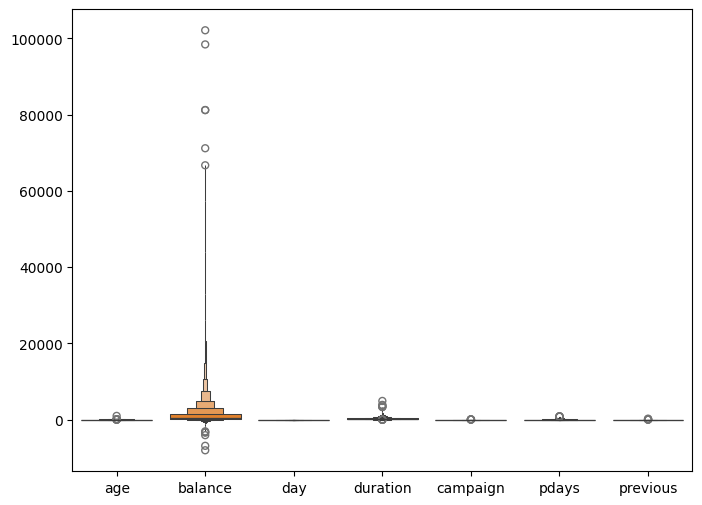

In [7]:
plt.figure(figsize=(8, 6))
sns.boxenplot(df)

In [8]:
for col in df.select_dtypes(include='number'):
    outliers = {}

    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lwr = q1 - 1.5 * iqr
    upr = q3 + 1.5 * iqr

    mean_value = df[col].mean()

    df[col] = df[col].apply(lambda x:mean_value if x < lwr or x > upr else x)

<Axes: >

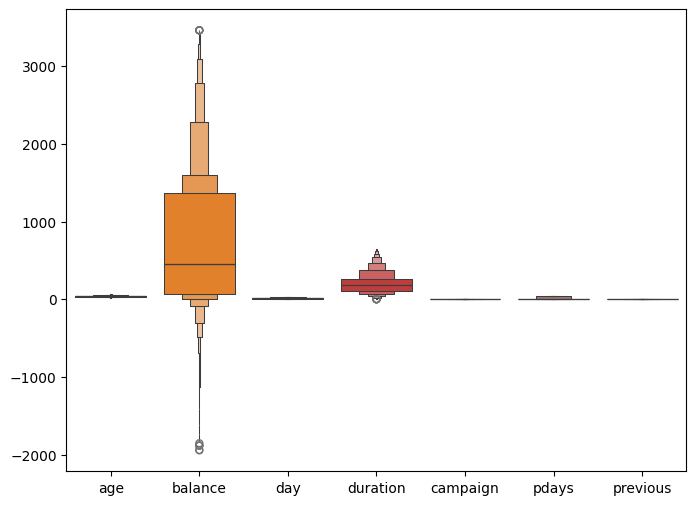

In [9]:
plt.figure(figsize=(8, 6))
sns.boxenplot(df)

In [10]:
nilai_unik = {}
for col in df.select_dtypes(include='object'):
    nilai_unik[col] = df[col].unique()

In [11]:
type(df)

pandas.core.frame.DataFrame

In [12]:
nilai_unik

{'job': array(['management', 'technician', 'entrepreneur', 'blue-collar',
        'unknown', 'admin.', 'services', 'retired', 'self-employed',
        'unemployed', 'housemaid', 'student'], dtype=object),
 'marital': array(['married', 'single', 'divorced'], dtype=object),
 'education': array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object),
 'default': array(['no', 'yes'], dtype=object),
 'housing': array(['yes', 'no'], dtype=object),
 'loan': array(['no', 'yes'], dtype=object),
 'contact': array(['unknown', 'cellular', 'telephone'], dtype=object),
 'month': array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
        'mar', 'apr', 'sep'], dtype=object),
 'poutcome': array(['unknown', 'failure', 'other', 'success'], dtype=object),
 'y': array(['no', 'yes'], dtype=object)}

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45200 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45200 non-null  float64
 1   job        45200 non-null  object 
 2   marital    45200 non-null  object 
 3   education  45200 non-null  object 
 4   default    45200 non-null  object 
 5   balance    45200 non-null  float64
 6   housing    45200 non-null  object 
 7   loan       45200 non-null  object 
 8   contact    45200 non-null  object 
 9   day        45200 non-null  int64  
 10  month      45200 non-null  object 
 11  duration   45200 non-null  float64
 12  campaign   45200 non-null  float64
 13  pdays      45200 non-null  float64
 14  previous   45200 non-null  float64
 15  poutcome   45200 non-null  object 
 16  y          45200 non-null  object 
dtypes: float64(6), int64(1), object(10)
memory usage: 6.2+ MB


In [14]:
def label_encoding(df):
    mappings = {} #membuat dictionary untuk menyimpan nilai unik
    for col in df.select_dtypes(include='object'): #for loop untuk kolom bertipe object
        unique_labels = df[col].unique() #mengambil nilai untuk tiap kolom
        value_to_label = {value: key for key, value in enumerate(unique_labels)} #membuat dictionary yang memetakan nilai unik ke angka
        mappings[col] = value_to_label #menyimpan hasil mapping
        df[col] = df[col].map(value_to_label) #mapping
    return df, mappings

In [15]:
df, mappings = label_encoding(df)

In [16]:
type(df)

pandas.core.frame.DataFrame

In [17]:
mappings

{'job': {'management': 0,
  'technician': 1,
  'entrepreneur': 2,
  'blue-collar': 3,
  'unknown': 4,
  'admin.': 5,
  'services': 6,
  'retired': 7,
  'self-employed': 8,
  'unemployed': 9,
  'housemaid': 10,
  'student': 11},
 'marital': {'married': 0, 'single': 1, 'divorced': 2},
 'education': {'tertiary': 0, 'secondary': 1, 'unknown': 2, 'primary': 3},
 'default': {'no': 0, 'yes': 1},
 'housing': {'yes': 0, 'no': 1},
 'loan': {'no': 0, 'yes': 1},
 'contact': {'unknown': 0, 'cellular': 1, 'telephone': 2},
 'month': {'may': 0,
  'jun': 1,
  'jul': 2,
  'aug': 3,
  'oct': 4,
  'nov': 5,
  'dec': 6,
  'jan': 7,
  'feb': 8,
  'mar': 9,
  'apr': 10,
  'sep': 11},
 'poutcome': {'unknown': 0, 'failure': 1, 'other': 2, 'success': 3},
 'y': {'no': 0, 'yes': 1}}

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45200 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45200 non-null  float64
 1   job        45200 non-null  int64  
 2   marital    45200 non-null  int64  
 3   education  45200 non-null  int64  
 4   default    45200 non-null  int64  
 5   balance    45200 non-null  float64
 6   housing    45200 non-null  int64  
 7   loan       45200 non-null  int64  
 8   contact    45200 non-null  int64  
 9   day        45200 non-null  int64  
 10  month      45200 non-null  int64  
 11  duration   45200 non-null  float64
 12  campaign   45200 non-null  float64
 13  pdays      45200 non-null  float64
 14  previous   45200 non-null  float64
 15  poutcome   45200 non-null  int64  
 16  y          45200 non-null  int64  
dtypes: float64(6), int64(11)
memory usage: 6.2 MB


In [19]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,40.954292,0,0,0,0,2143.000000,0,0,0,5,0,261.000000,1.0,-1.000000,0.000000,0,0
1,44.000000,1,1,1,0,29.000000,0,0,0,5,0,151.000000,1.0,-1.000000,0.000000,0,0
2,33.000000,2,0,1,0,2.000000,0,1,0,5,0,76.000000,1.0,-1.000000,0.000000,0,0
3,47.000000,3,0,2,0,1506.000000,0,0,0,5,0,92.000000,1.0,-1.000000,0.000000,0,0
4,33.000000,4,1,2,0,1.000000,1,0,0,5,0,198.000000,1.0,-1.000000,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.000000,1,0,0,0,825.000000,1,0,1,17,5,258.141637,3.0,-1.000000,0.000000,0,1
45207,40.954292,7,2,3,0,1729.000000,1,0,1,17,5,456.000000,2.0,-1.000000,0.000000,0,1
45208,40.954292,7,0,1,0,1362.565686,1,0,1,17,5,258.141637,5.0,40.207854,0.580465,3,1
45209,57.000000,3,0,1,0,668.000000,1,0,2,17,5,508.000000,4.0,-1.000000,0.000000,0,0


In [20]:
x = df.drop(columns='y')
y = df['y']

In [21]:
def stratified_split(x, y, train_size=0.8):
    np.random.seed(0) #agar hasil acak konsisten

    # Menampilkan distribusi awal
    unique_labels = np.unique(y)
    label_counts = {label: sum(y == label) for label in unique_labels}
    print('Distribusi Awal :', label_counts)

    label_to_indices = {} #menyimpan kelompok indeks berdasarkan label
    for i, label in enumerate(y): #mengelompokkan indeks berdasarkan label
        label_to_indices.setdefault(label, []).append(i)

    train_indices, test_indices = [], [] #membuat list kosong untuk data train dan test

    for label, indices in label_to_indices.items(): #mengacak indeks tiap label dengan mempertahankan proporsinya
        shuffled_indices = indices[:]
        np.random.shuffle(shuffled_indices)

        split_idx = max(1, int(len(shuffled_indices) * train_size)) #menentukan ukuran data test
        test_indices.extend(shuffled_indices[split_idx:]) #menentukan data test
        train_indices.extend(shuffled_indices[:split_idx]) #menentukan data train

    x_train = x.iloc[train_indices].reset_index(drop=True)
    x_test = x.iloc[test_indices].reset_index(drop=True)
    y_train = y.iloc[train_indices].reset_index(drop=True)
    y_test = y.iloc[test_indices].reset_index(drop=True)

    # Menampilkan distribusi setelah split
    train_counts = {label: sum(y_train == label) for label in unique_labels}
    test_counts = {label: sum(y_test == label) for label in unique_labels}
    
    print('Distribusi train :', train_counts)
    print('Distribusi test :', test_counts)

    return x_train, x_test, y_train, y_test

In [22]:
x_train, x_test, y_train, y_test = stratified_split(x, y, train_size=0.8)

Distribusi Awal : {np.int64(0): 39911, np.int64(1): 5289}
Distribusi train : {np.int64(0): 31928, np.int64(1): 4231}
Distribusi test : {np.int64(0): 7983, np.int64(1): 1058}


In [23]:
def normalisasi(train_fitur):
    min_train = train_fitur.min(axis=0)
    max_train = train_fitur.max(axis=0)
    norm_train = (train_fitur - min_train) / (max_train - min_train)
    return min_train, max_train, norm_train

In [24]:
min_train, max_train, x_train = normalisasi(x_train)

In [25]:
x_test = (x_test - min_train) / (max_train - min_train)

In [26]:
train_df = pd.concat([x_train, y_train], axis=1)

In [27]:
def oversampling(data_train):
    class_0 = df[df['y'] == 0]
    class_1 = df[df['y'] == 1]

    n_class_0 = len(class_0)
    n_class_1 = len(class_1)

    oversampled_class_1 = class_1.sample(n=n_class_0, replace=True, random_state=0)

    balanced_train = pd.concat([oversampled_class_1, class_0], ignore_index=True)

    x_train_balanced = balanced_train.drop(columns='y')
    y_train_balanced = balanced_train['y']

    print('sebelum oversampling : ')
    print(y_train.value_counts())

    print('setelah oversampling : ')
    print(y_train_balanced.value_counts())

    return x_train_balanced, y_train_balanced

In [28]:
x_train, y_train = oversampling(train_df)

sebelum oversampling : 
y
0    31928
1     4231
Name: count, dtype: int64
setelah oversampling : 
y
1    39911
0    39911
Name: count, dtype: int64


In [29]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [30]:
class KNN :
    def __init__(self, k=3):
        self.k = k
    def fit(self, x_train, y_train):
        self.train_fitur = x_train
        self.train_label = y_train
    def predict(self, x_test):
        predictions = [self._predict(x) for x in x_test]
        return np.array(predictions)
    def _predict(self, x):
        distances = [self.euclidean_distances(x, x_train) for x_train in self.train_fitur]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels =[self.train_label[i] for i in k_indices]
        label_counts = {}
        for label in k_nearest_labels:
            label_counts[label] = label_counts.get(label, 0) + 1
        most_common = max(label_counts, key=label_counts.get)
        return most_common
    def euclidean_distances(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

In [31]:
knn = KNN(k=3)

In [32]:
knn.fit(x_train, y_train)

In [33]:
x_test = np.array(x_test)

In [34]:
y_pred_test = knn.predict(x_test)

KeyboardInterrupt: 

In [ ]:
import numpy as np

def evaluate_metrics(y_true, y_pred):
    """
    Menghitung precision, recall, dan f1-score dari prediksi.

    Parameters:
    y_true (array-like): Label sebenarnya.
    y_pred (array-like): Label yang diprediksi.

    Returns:
    dict: Dictionary yang berisi precision, recall, dan f1-score.
    """
    TP = np.sum((y_true == 1) & (y_pred == 1))  # True Positives
    FP = np.sum((y_true == 0) & (y_pred == 1))  # False Positives
    FN = np.sum((y_true == 1) & (y_pred == 0))  # False Negatives
    
    # Accuracy
    accuracy = np.mean(y_true == y_pred)

    # Precision
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0.0
    
    # Recall
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0.0
    
    # F1-score
    if precision + recall == 0:
        f1 = 0.0
    else:
        f1 = 2 * (precision * recall) / (precision + recall)

    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1_score': f1}

In [ ]:
metrics_test = evaluate_metrics(y_test, y_pred_test)

In [ ]:
print('Evaluasi Data Testing : ')
print(f"Accuracy: {metrics_test['accuracy']:.2f}")
print(f"Precision: {metrics_test['precision']:.2f}")
print(f"Recall: {metrics_test['recall']:.2f}")
print(f"F1-score: {metrics_test['f1_score']:.2f}")